In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Age', ylabel='Count'>

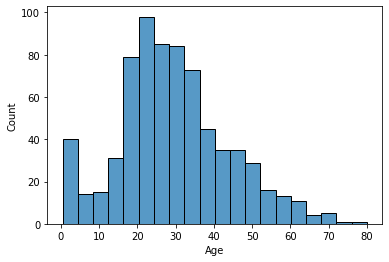

In [5]:
sb.histplot(df.Age)

In [6]:
temp=df.loc[df.Cabin.notnull()].Cabin

In [7]:
temp.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
E101           3
              ..
E49            1
E17            1
E58            1
E38            1
B38            1
Name: Cabin, Length: 147, dtype: int64

We should delete this Cabin attribute because it contains lots of null values and it do not provide any useful information 

In [8]:
df=df.drop('Cabin',axis=1)

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [13]:
# import ipywidgets as widgets
# from ipywidgets import interact
# from ipywidgets import interact_manual

# @interact
# def check(col=list(df.columns)):
#     sb.barplot(df[col],df.Survived)

In [14]:
df['Age']=df['Age']//1

In [15]:
categorical_columns=df.select_dtypes(include=['object'])

In [16]:
categorical_columns=list(categorical_columns.columns)

In [17]:
categorical_columns

['Name', 'Sex', 'Ticket', 'Embarked']

In [18]:
# sb.histplot(df.Ticket);

In [19]:
# sb.histplot(df.Name)

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

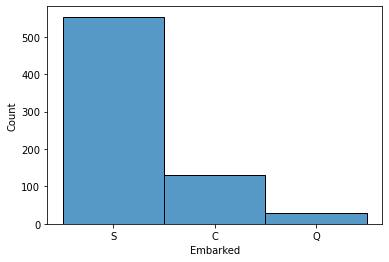

In [20]:
sb.histplot(df.Embarked)

### I think it will be better to drop Name column along with Ticket because they does not making any sense and do not adding anything to the data

In [21]:
df=df.drop(['Name','Ticket'],axis=1)

In [22]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [23]:
df_copy=df.copy()
df_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [24]:
replace_map={'Sex':{'male':1,'female':0},'Embarked':{'C':0,'S':1,'Q':2}}

In [25]:
df_copy.replace(replace_map,inplace=True)

In [26]:
df_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,29.1250,2
886,887,0,2,1,27.0,0,0,13.0000,1
887,888,1,1,0,19.0,0,0,30.0000,1
889,890,1,1,1,26.0,0,0,30.0000,0


In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    int64  
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 55.6 KB


In [28]:
Y=df['Survived']
data=df_copy.drop('Survived',axis=1)

In [29]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

In [30]:
standardized_data

array([[-1.7314791 ,  0.90859974,  0.75613751, ..., -0.50678737,
        -0.51637992,  0.31923045],
       [-1.72761065, -1.48298257, -1.32251077, ..., -0.50678737,
         0.69404605, -1.9091233 ],
       [-1.7237422 ,  0.90859974, -1.32251077, ..., -0.50678737,
        -0.50362035,  0.31923045],
       ...,
       [ 1.69983604, -1.48298257, -1.32251077, ..., -0.50678737,
        -0.08633507,  0.31923045],
       [ 1.70757294, -1.48298257,  0.75613751, ..., -0.50678737,
        -0.08633507, -1.9091233 ],
       [ 1.71144139,  0.90859974,  0.75613751, ..., -0.50678737,
        -0.50692839,  2.54758421]])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(standardized_data,Y,test_size=0.33,random_state=40)

In [32]:
X_tr,X_cv,Y_tr,Y_cv=train_test_split(X_train,Y_train,test_size=0.33,random_state=40)

In [33]:
print(X_tr.shape,X_cv.shape,X_test.shape)

(319, 8) (158, 8) (235, 8)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc=np.arange(30)

In [35]:
for i in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr,Y_tr)
    pred=knn.predict(X_cv)
    accuracy=accuracy_score(Y_cv,pred)*float(100)
    print("accuracy for %d is %d" % (i,accuracy))
    acc[i]=accuracy

accuracy for 1 is 74
accuracy for 3 is 79
accuracy for 5 is 78
accuracy for 7 is 81
accuracy for 9 is 79
accuracy for 11 is 81
accuracy for 13 is 81
accuracy for 15 is 82
accuracy for 17 is 81
accuracy for 19 is 81
accuracy for 21 is 81
accuracy for 23 is 81
accuracy for 25 is 81
accuracy for 27 is 80
accuracy for 29 is 80


In [36]:
i_arr=np.zeros(15)
acc_arr=np.zeros(15)

In [37]:
j=0
for i in range(1,30,2):
    i_arr[j]=i
    acc_arr[j]=acc[i]
    j+=1
    

<AxesSubplot:>

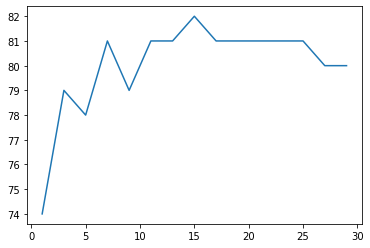

In [38]:
sb.lineplot(i_arr,acc_arr)

### Hence maximum accuracy is at K=15

In [39]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_tr,Y_tr)
pred=knn.predict(X_test)
print(accuracy_score(Y_test,pred)*float(100))

75.74468085106383


# Upgradation 1: Using 10 fold cross validation

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
neighbors=[i for i in range(0,30) if i%2!=0 ]

In [42]:
cv_scores=[]

In [43]:
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X_train,Y_train,cv=5,scoring='accuracy')
    cv_scores.append(score.mean()*float(100))

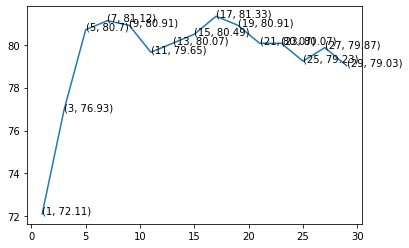

In [44]:
plt.plot(neighbors,cv_scores)
for xy in zip(neighbors,np.round(cv_scores,2)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

In [45]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print(accuracy_score(Y_test,pred)*float(100))

77.87234042553192
